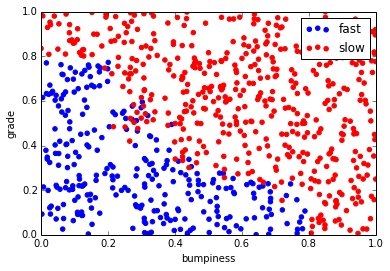

training time:  0.001 s
predicting time:  0.001 s
accuracy:  0.92


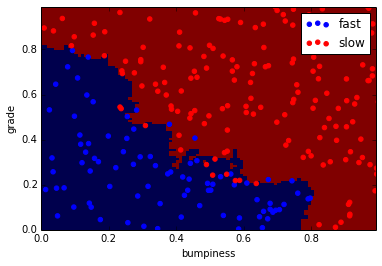

In [22]:
# %load your_algorithm.py
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from time import time
%matplotlib inline


features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
t0 = time()
# features_train = features_train[:len(features_train)/100]
# labels_train = labels_train[:len(labels_train)/100]
clf.fit(features_train, labels_train)
print "training time: ", round(time()-t0, 3), "s"

t1 = time()
pred = clf.predict(features_test)
print "predicting time: ", round(time()-t1, 3), "s"

from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)
print "accuracy: ", acc



try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass